# Introducción

En este ejercicio, vamos a trabajar con `scikit-learn` para realizar un análisis de regresión. Comenzaremos generando un conjunto de datos sintético, luego ajustaremos un modelo de regresión lineal y evaluaremos su rendimiento.

## Objetivo

1. **Generación de Datos**: Crear un conjunto de datos sintético para la regresión.
2. **Visualización de Datos**: Pintar los datos para visualizar la relación entre las variables.
3. **Ajuste de Modelos**: Ajustar un modelo de regresión lineal a los datos.
4. **Evaluación de Modelos**: Evaluar el rendimiento del modelo utilizando métricas de error y precisión.
5. **Otros modelos**: Probar diferentes modelos incluidos en `scikit-learn`.

## Ejercicio 1: Generar Datos Sintéticos

Vamos a generar un conjunto de datos sintético para la regresión utilizando `numpy`. Crearemos una relación lineal entre las variables independientes y dependientes.

Completa el siguiente código para generar los datos sintéticos, en particular, genera 20 muestras tal que:
$$
X \in [0,1], \quad y \in \mathbb{R}
$$

Añade ruido gaussiano con $\eta \sim \mathcal{N} (\mu = 0, \sigma=0.5)$ de manera que el modelo de generación sea:

$$
y = 3x + 4 + \eta
$$


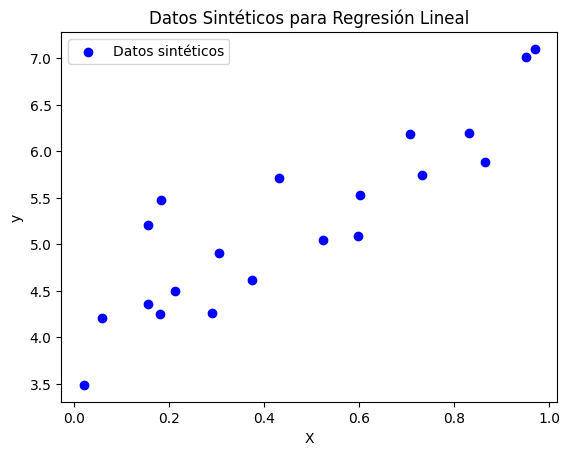

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Configuración de la semilla para reproducibilidad
np.random.seed(42)

# Generar datos sintéticos
n_samples = 20
X = np.random.rand(n_samples, 1)
y = 4 + 3 * X + 0.5*np.random.randn(n_samples, 1)

# Visualizar los datos generados
plt.scatter(X, y, color='blue', marker='o', label='Datos sintéticos')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Datos Sintéticos para Regresión Lineal')
plt.legend()
plt.show()


**Objetivo**: Ejecuta el código para generar y visualizar los datos sintéticos.

## Ejercicio 2: Dividir los Datos

Divide el conjunto de datos en conjuntos de entrenamiento y prueba. Utiliza `train_test_split` para realizar esta división.

Completa el siguiente código para dividir los datos y mostrar las formas de los conjuntos resultantes:


In [ ]:
from sklearn.model_selection import train_test_split

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mostrar las dimensiones de los conjuntos de datos
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)


X_train: (16, 1)
X_test: (4, 1)
y_train: (16, 1)
y_test: (4, 1)


## Ejercicio 3: Ajustar el Modelo

Ajusta un modelo de regresión lineal a los datos de entrenamiento. Usa `LinearRegression` para crear el modelo y ajustarlo.

Completa el siguiente código para entrenar el modelo y hacer predicciones sobre el conjunto de prueba:


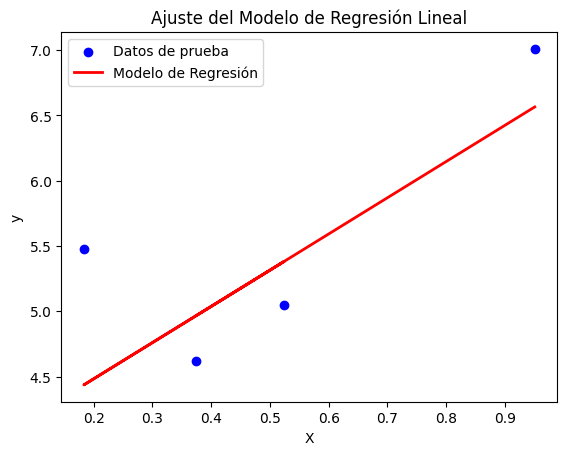

In [ ]:
from sklearn.linear_model import LinearRegression

# Crear y ajustar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Visualizar el ajuste del modelo
plt.scatter(X_test, y_test, color='blue', marker='o', label='Datos de prueba')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Modelo de Regresión')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Ajuste del Modelo de Regresión Lineal')
plt.legend()
plt.show()


Recupera los coeficientes del modelo entrenado y construye una función `trained_model` que implemente el modelo lineal.

Comprueba que sale lo mismo que al usar `model.predict`.


<div style="background-color: lightblue; padding: 10px; border-radius: 5px; font-style: italic;">
    ¿Se parecen los parámetros a los del modelo original?
</div>


Pendiente: 2.7751126565255024, Sesgo: 3.926575415974961
¿Son iguales las predicciones? True


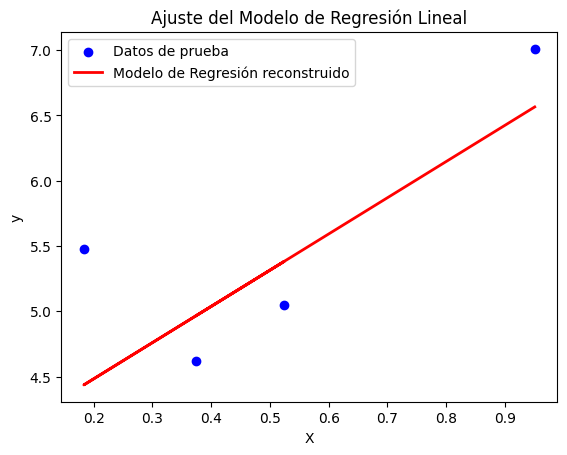

In [ ]:
# Recuperar los parámetros óptimos del modelo
def trained_model(x):
    return x*model.coef_ + model.intercept_

print(f'Pendiente: {model.coef_.squeeze()}, Sesgo: {model.intercept_.squeeze()}')

# Comprobar equivalencia
print(f'¿Son iguales las predicciones? {np.allclose(model.predict(X_test), trained_model(X_test))}')

# Visualizar el ajuste del modelo
plt.scatter(X_test, y_test, color='blue', marker='o', label='Datos de prueba')
plt.plot(X_test, trained_model(X_test), color='red', linewidth=2, label='Modelo de Regresión reconstruido')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Ajuste del Modelo de Regresión Lineal')
plt.legend()
plt.show()

## Ejercicio 4: Evaluar el Modelo

Evalúa el rendimiento del modelo utilizando métricas como el error cuadrático medio (MSE) y el error absoluto medio (MAE).

Para ello, usa funciones de `scikit-learn`.


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error


# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Error Cuadrático Medio:", mse)
print("Error Absoluto Medio:", mae)

Error Cuadrático Medio: 0.3790547053610702
Error Absoluto Medio: 0.5428355846845097


Ahora, implementa cada función y comprueba que se obtienen los mismos resultados:

In [ ]:
def mse(y, y_hat):
    return np.mean((y-y_hat)**2)

def mae(y, y_hat):
    return np.mean(np.abs(y-y_hat))

# Evaluar el modelo
mse = mse(y_test, y_pred)
mae = mae(y_test, y_pred)

print("Error Cuadrático Medio:", mse)
print("Error Absoluto Medio:", mae)

Error Cuadrático Medio: 0.3790547053610702
Error Absoluto Medio: 0.5428355846845097


## Ejercicio 5: Otros modelos

Ahora, vamos a probar a transformar las características de entrada, antes de hacer regresión lineal. Para ello, haz uso de `PolynomialFeatures`.

<div style="background-color: lightblue; padding: 10px; border-radius: 5px; font-style: italic;">
    ¿Qué hace esta clase? Busca en la documentación, algún ejemplo de uso, hasta que comprendas su funcionamiento. Luego, añade una regresión lineal y ajusta el modelo.
</div>

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [ ]:
# Creamos un modelo polinómico de grado 2
degree = 2
poly_encoder = PolynomialFeatures(degree=degree)

# Creamos unos datos de ejemplo para analizar las características generadas

x_prueba = np.array([1, 2, 3]).reshape(-1,1) # hacemos reshape para que tenga dimensiones (3,1)
x_prueba_poly = poly_encoder.fit_transform(x_prueba)

print(x_prueba_poly)

[[1. 1. 1.]
 [1. 2. 4.]
 [1. 3. 9.]]


Lo usamos ahora con nuestros datos

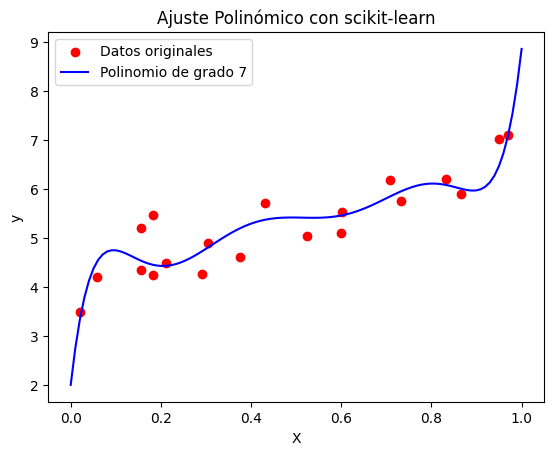

In [ ]:
degree = 7
poly_encoder = PolynomialFeatures(degree=degree)
X_train_poly = poly_encoder.fit_transform(X_train)

# Entrena el modelo de regresión lineal
model = LinearRegression().fit(X_train_poly, y_train)


# Haz predicciones en todo el rango [0,1]
X_range = np.linspace(0, 1, 100).reshape(-1, 1)  # Valores para graficar
y_pred = model.predict(poly_encoder.transform(X_range))

# Graficar los datos originales y la curva ajustada
plt.scatter(X, y, color='red', label='Datos originales')
plt.plot(X_range, y_pred, color='blue', label=f'Polinomio de grado {degree}')
plt.title('Ajuste Polinómico con scikit-learn')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

Repite el proceso usando otros modelos y compara los resultados con el `linear_regression`.

In [ ]:
from sklearn.utils import all_estimators

# Obtener todos los regresores
regresores = all_estimators(type_filter='regressor')

for nombre, clase in regresores:
    print(nombre, clase)


ARDRegression <class 'sklearn.linear_model._bayes.ARDRegression'>
AdaBoostRegressor <class 'sklearn.ensemble._weight_boosting.AdaBoostRegressor'>
BaggingRegressor <class 'sklearn.ensemble._bagging.BaggingRegressor'>
BayesianRidge <class 'sklearn.linear_model._bayes.BayesianRidge'>
CCA <class 'sklearn.cross_decomposition._pls.CCA'>
DecisionTreeRegressor <class 'sklearn.tree._classes.DecisionTreeRegressor'>
DummyRegressor <class 'sklearn.dummy.DummyRegressor'>
ElasticNet <class 'sklearn.linear_model._coordinate_descent.ElasticNet'>
ElasticNetCV <class 'sklearn.linear_model._coordinate_descent.ElasticNetCV'>
ExtraTreeRegressor <class 'sklearn.tree._classes.ExtraTreeRegressor'>
ExtraTreesRegressor <class 'sklearn.ensemble._forest.ExtraTreesRegressor'>
GammaRegressor <class 'sklearn.linear_model._glm.glm.GammaRegressor'>
GaussianProcessRegressor <class 'sklearn.gaussian_process._gpr.GaussianProcessRegressor'>
GradientBoostingRegressor <class 'sklearn.ensemble._gb.GradientBoostingRegressor'>

MSE: 0.4092816948910796


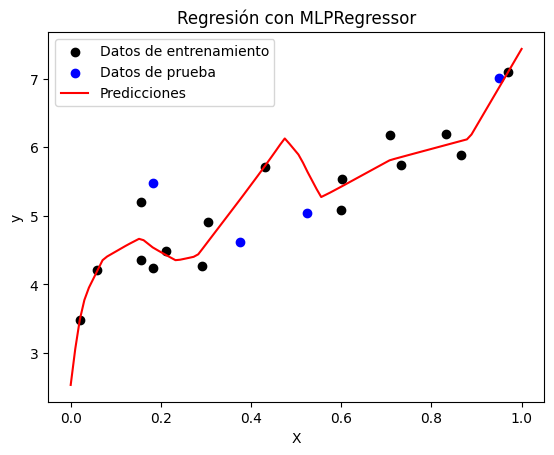

In [ ]:
from sklearn.neural_network import MLPRegressor

from sklearn.metrics import mean_squared_error

# Definir el modelo MLP
model = MLPRegressor(hidden_layer_sizes=(256, ), max_iter=500,  alpha=0, solver='lbfgs', activation='relu', learning_rate='adaptive')

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train.ravel())

# Predecir los valores de prueba
y_test_hat = model.predict(X_test)

# Calcular el MSE usando sklearn
mse = mean_squared_error(y_test, y_test_hat)
print(f'MSE: {mse}')

# Graficar los puntos de entrenamiento
plt.scatter(X_train, y_train, color='black', label='Datos de entrenamiento')

# Graficar los puntos de prueba y las predicciones
plt.scatter(X_test, y_test, color='blue', label='Datos de prueba')
plt.plot(np.linspace(0,1,100), model.predict(np.linspace(0,1,100).reshape(-1,1)), color='red', label='Predicciones')

# Títulos y leyenda
plt.title('Regresión con MLPRegressor')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

# Mostrar la gráfica
plt.show()